In [39]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [40]:
CLIENT_ID = 'NRX2HJ0WUADV3KS2ZW0RUZ2X1X5FV5GZ5EQCRUKKEYP2TIKC' # your Foursquare ID
CLIENT_SECRET = 'JJAWZLNLGMP51ATVOQLL4U0SRPOX30ROP4VBHYJHHXR5OTAQ' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 50
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NRX2HJ0WUADV3KS2ZW0RUZ2X1X5FV5GZ5EQCRUKKEYP2TIKC
CLIENT_SECRET:JJAWZLNLGMP51ATVOQLL4U0SRPOX30ROP4VBHYJHHXR5OTAQ


### We will be exploring music venues in Nashville. 
### The first step is to retrieve the location data using the Foursquare API for the music venues closest to the center of Nashville.
### Unfortunately the free version of the Foursquare API limits queries to 50 results.
### However the 50 results actually cover an area roughly the size of Nashville, so this data will be enough for some meaningful analysis.

In [41]:
latitude = 36.174465
longitude = -86.767960
radius = 5000
categoryId= '4bf58dd8d48988d1e5931735' #instead of searching a query, search by categoryId using the categoryId for Live Music Venues - there is a list of cat-Ids on the foursquare website
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT, categoryId)
results = requests.get(url).json()

### After retreiving the location data using the Foursquare API, we convert the information from JSON format to a dataframe

In [42]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,...,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,location.crossStreet,venuePage.id,location.neighborhood
0,5538733e498e339377d11a0f,The Basement East,"[{'id': '4bf58dd8d48988d1e9931735', 'name': 'R...",v-1602906464,False,917 Woodland St,36.175629,-86.755681,"[{'label': 'display', 'lat': 36.17562944628696...",1110,...,"[917 Woodland St, Nashville, TN 37206, United ...",2249008,https://www.grubhub.com/restaurant/the-pub-at-...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN,NaN
1,4b058668f964a520cb6022e3,3rd & Lindsley Bar and Grill,"[{'id': '4bf58dd8d48988d116941735', 'name': 'B...",v-1602906464,False,816 3rd Ave S,36.152179,-86.769912,"[{'label': 'display', 'lat': 36.1521786574327,...",2487,...,"[816 3rd Ave S (at Lindsley Ave.), Nashville, ...",NaN,NaN,NaN,NaN,NaN,NaN,at Lindsley Ave.,NaN,NaN
2,4c2a5387d1a10f478144f664,Belcourt Taps,"[{'id': '4bf58dd8d48988d116941735', 'name': 'B...",v-1602906464,False,2117 Belcourt Ave,36.136625,-86.802382,"[{'label': 'display', 'lat': 36.13662518832823...",5226,...,"[2117 Belcourt Ave, Nashville, TN 37212, Unite...",1556846,https://www.grubhub.com/restaurant/belcourt-ta...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,45398177,NaN
3,4b1c441cf964a5203a0524e3,Commodore Grille,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",v-1602906464,False,2613 West End Ave,36.145022,-86.811139,"[{'label': 'display', 'lat': 36.14502192586651...",5079,...,[2613 West End Ave (at Holiday Inn West End Ho...,NaN,NaN,NaN,NaN,NaN,NaN,at Holiday Inn West End Hotel,76721496,NaN
4,4b058669f964a520f36022e3,The Sutler,"[{'id': '52e81612bcbc57f1066b7a00', 'name': 'C...",v-1602906464,False,"2600 8th Ave S, Suite 109",36.121999,-86.775233,"[{'label': 'display', 'lat': 36.12199872037557...",5876,...,"[2600 8th Ave S, Suite 109, Nashville, TN 3720...",1917459,https://www.grubhub.com/restaurant/the-sutler-...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN,NaN


In [43]:
dataframe.shape

(50, 25)

### Then we clean up the dataframe...

In [44]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head(5)

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
0,The Basement East,Rock Club,917 Woodland St,36.175629,-86.755681,"[{'label': 'display', 'lat': 36.17562944628696...",1110,37206,US,Nashville,TN,United States,"[917 Woodland St, Nashville, TN 37206, United ...",NaN,NaN,5538733e498e339377d11a0f
1,3rd & Lindsley Bar and Grill,Bar,816 3rd Ave S,36.152179,-86.769912,"[{'label': 'display', 'lat': 36.1521786574327,...",2487,37210,US,Nashville,TN,United States,"[816 3rd Ave S (at Lindsley Ave.), Nashville, ...",at Lindsley Ave.,NaN,4b058668f964a520cb6022e3
2,Belcourt Taps,Bar,2117 Belcourt Ave,36.136625,-86.802382,"[{'label': 'display', 'lat': 36.13662518832823...",5226,37212,US,Nashville,TN,United States,"[2117 Belcourt Ave, Nashville, TN 37212, Unite...",NaN,NaN,4c2a5387d1a10f478144f664
3,Commodore Grille,American Restaurant,2613 West End Ave,36.145022,-86.811139,"[{'label': 'display', 'lat': 36.14502192586651...",5079,37203,US,Nashville,TN,United States,[2613 West End Ave (at Holiday Inn West End Ho...,at Holiday Inn West End Hotel,NaN,4b1c441cf964a5203a0524e3
4,The Sutler,Comfort Food Restaurant,"2600 8th Ave S, Suite 109",36.121999,-86.775233,"[{'label': 'display', 'lat': 36.12199872037557...",5876,37204,US,Nashville,TN,United States,"[2600 8th Ave S, Suite 109, Nashville, TN 3720...",NaN,NaN,4b058669f964a520f36022e3


### And finally we are ready to plot the venue locations on a map of the city using the latitude and longitude coordinates for each venue.

In [45]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=12) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

### We can also use the location data of each venue to identify hot-spots, where multiple music venues are located in small areas.
### We will use DBSCAN clustering to identify clusters of music venues based on the density of the coordinates.

In [46]:
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from collections import Counter
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6
%matplotlib inline

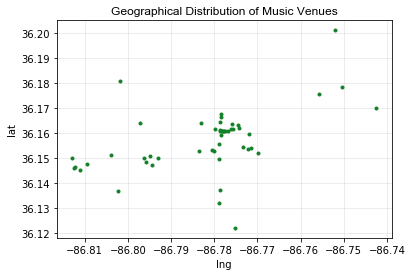

In [47]:
_ = plt.plot(dataframe_filtered['lng'], dataframe_filtered['lat'],
            marker='.', linewidth=0, color='#128128')
_ = plt.grid(which='major', color='#cccccc', alpha=0.45)
_ = plt.title('Geographical Distribution of Music Venues', family='Arial', fontsize=12)
_ = plt.xlabel ('lng')
_ = plt.ylabel ('lat')
_ = plt.show()

In [48]:
dbscan_data = dataframe_filtered[['lng','lat']]
dbscan_data = dbscan_data.values.astype('float32', copy=False)
dbscan_data

array([[-86.755684,  36.17563 ],
       [-86.76991 ,  36.15218 ],
       [-86.80238 ,  36.136623],
       [-86.81114 ,  36.145023],
       [-86.77523 ,  36.121998],
       [-86.79454 ,  36.147175],
       [-86.81233 ,  36.14638 ],
       [-86.77881 ,  36.149452],
       [-86.7775  ,  36.160763],
       [-86.778114,  36.1609  ],
       [-86.81261 ,  36.145916],
       [-86.778915,  36.131855],
       [-86.78012 ,  36.152874],
       [-86.81296 ,  36.14995 ],
       [-86.75037 ,  36.178486],
       [-86.776825,  36.160835],
       [-86.778015,  36.160873],
       [-86.78046 ,  36.15306 ],
       [-86.797165,  36.164024],
       [-86.77773 ,  36.160843],
       [-86.77608 ,  36.161674],
       [-86.77224 ,  36.153763],
       [-86.78352 ,  36.152805],
       [-86.79297 ,  36.15008 ],
       [-86.77862 ,  36.13704 ],
       [-86.80177 ,  36.180744],
       [-86.77592 ,  36.163486],
       [-86.778786,  36.164524],
       [-86.77333 ,  36.15429 ],
       [-86.77158 ,  36.154068],
       [-8

In [49]:
dbscan_data_scaler = StandardScaler().fit(dbscan_data)
dbscan_data = dbscan_data_scaler.transform(dbscan_data)
dbscan_data

array([[ 1.7128589 ,  1.4882165 ],
       [ 0.7933454 , -0.38413134],
       [-1.3050189 , -1.6262714 ],
       [-1.871025  , -0.95555234],
       [ 0.44969878, -2.79409   ],
       [-0.7981772 , -0.78376055],
       [-1.9479388 , -0.84711635],
       [ 0.21846457, -0.601917  ],
       [ 0.30326688,  0.3012083 ],
       [ 0.2633309 ,  0.31217372],
       [-1.9656881 , -0.884277  ],
       [ 0.21156207, -2.0070157 ],
       [ 0.13366225, -0.32869497],
       [-1.9883678 , -0.56231964],
       [ 2.0565054 ,  1.7163584 ],
       [ 0.34665412,  0.3069956 ],
       [ 0.26974037,  0.31004155],
       [ 0.11196864, -0.31376982],
       [-0.9677818 ,  0.56163734],
       [ 0.28798273,  0.3076048 ],
       [ 0.3949717 ,  0.3740066 ],
       [ 0.6429692 , -0.25772426],
       [-0.08623212, -0.3341777 ],
       [-0.6966116 , -0.5516588 ],
       [ 0.2307905 , -1.5930705 ],
       [-1.2655759 ,  1.8966789 ],
       [ 0.40532547,  0.5186894 ],
       [ 0.21994369,  0.6015394 ],
       [ 0.57246494,

In [50]:
model = DBSCAN(eps = 0.25, min_samples = 4, metric='euclidean').\
    fit(dbscan_data)
model

DBSCAN(algorithm='auto', eps=0.25, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [51]:
outliers_df = dataframe_filtered[model.labels_ == -1]
clusters_df = dataframe_filtered[model.labels_ != -1]
colors = model.labels_
colors_clusters = colors[colors != -1]
color_outliers = 'black'
clusters = Counter(model.labels_)
print(clusters)
print(dataframe_filtered[model.labels_ == -1].head())
print('Number of clusters = {}'.format(len(clusters)-1))

Counter({1: 19, -1: 14, 4: 5, 3: 4, 0: 4, 2: 4})
                   name               categories                    address  \
0     The Basement East                Rock Club            917 Woodland St   
2         Belcourt Taps                      Bar          2117 Belcourt Ave   
4            The Sutler  Comfort Food Restaurant  2600 8th Ave S, Suite 109   
7        Fat Kat Slim’s                    Diner              730 8th Ave S   
11  Douglas Corner Cafe                 Dive Bar             2106 8th Ave S   

          lat        lng                                     labeledLatLngs  \
0   36.175629 -86.755681  [{'label': 'display', 'lat': 36.17562944628696...   
2   36.136625 -86.802382  [{'label': 'display', 'lat': 36.13662518832823...   
4   36.121999 -86.775233  [{'label': 'display', 'lat': 36.12199872037557...   
7   36.149453 -86.778806  [{'label': 'display', 'lat': 36.14945303273163...   
11  36.131855 -86.778916  [{'label': 'display', 'lat': 36.13185462252452...   

 

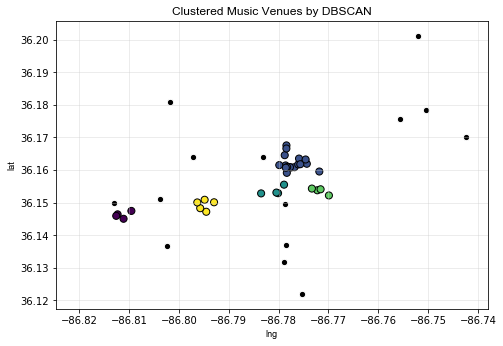

In [52]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])
ax.scatter(clusters_df['lng'], clusters_df['lat'],
          c = colors_clusters, edgecolors='black', s=50)
ax.scatter(outliers_df['lng'], outliers_df['lat'],
          c = color_outliers, edgecolors='white', s=40)
ax.set_xlabel('lng', family='Arial', fontsize=9)
ax.set_ylabel('lat', family='Arial', fontsize=9)
plt.title('Clustered Music Venues by DBSCAN', family='Arial', fontsize=12)
plt.grid(which='major', color='#cccccc', alpha=0.45)
plt.show()

### Now that we've identified 5 music venue clusters, or hot-spots in Nashville, lets explore the different clusters and see what we can learn.

In [62]:
dataframe_filtered['cluster']=model.labels_
cluster_data=dataframe_filtered[['name','categories','cluster']]
cluster_data=cluster_data[cluster_data.cluster != -1]
cluster_data.head(10)

,name,categories,cluster
1,3rd & Lindsley Bar and Grill,Bar,3
3,Commodore Grille,American Restaurant,0
5,Music Row,Music Venue,4
6,Springwater Supper Club & Lounge,Dive Bar,0
8,Nudie's Honky Tonk,Bar,1
9,Layla's,Bar,1
10,The Local,Bar,0
12,The Cannery Ballroom,Music Venue,2
15,Honky Tonk Central,Bar,1
16,Robert's Western World,Bar,1


In [54]:
cluster_data['cluster'].value_counts()

1    19
4     5
3     4
2     4
0     4
Name: cluster, dtype: int64

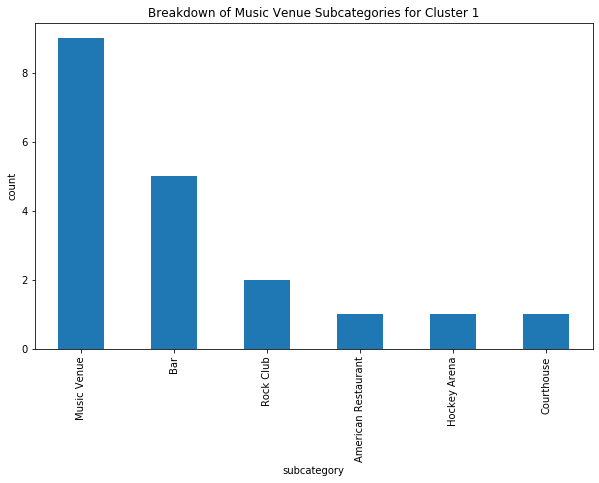

In [71]:
df_cluster1=cluster_data[cluster_data.cluster == 1]
df_cluster1=df_cluster1['categories'].value_counts()

df_cluster1.plot(kind='bar', figsize=(10, 6))

plt.xlabel('subcategory') # add to x-label to the plot
plt.ylabel('count') # add y-label to the plot
plt.title('Breakdown of Music Venue Subcategories for Cluster 1') # add title to the plot

plt.show()

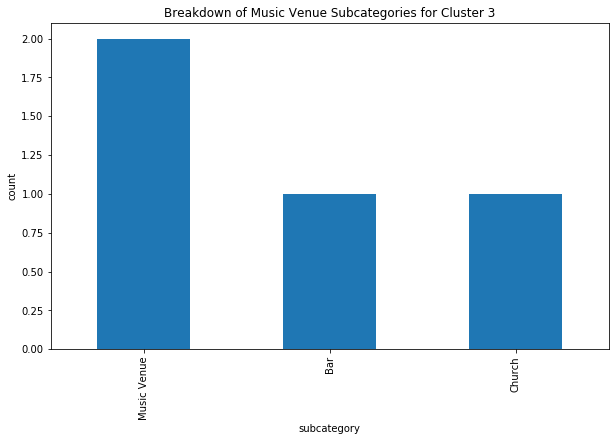

In [72]:
df_cluster3=cluster_data[cluster_data.cluster == 3]
df_cluster3=df_cluster3['categories'].value_counts()

df_cluster3.plot(kind='bar', figsize=(10, 6))

plt.xlabel('subcategory') # add to x-label to the plot
plt.ylabel('count') # add y-label to the plot
plt.title('Breakdown of Music Venue Subcategories for Cluster 3') # add title to the plot

plt.show()

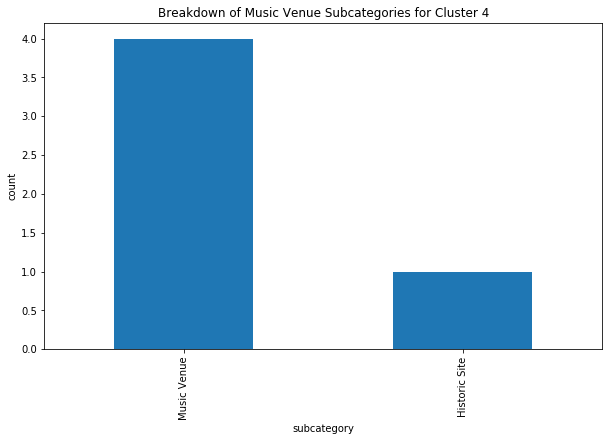

In [73]:
df_cluster4=cluster_data[cluster_data.cluster == 4]
df_cluster4=df_cluster4['categories'].value_counts()

df_cluster4.plot(kind='bar', figsize=(10, 6))

plt.xlabel('subcategory') # add to x-label to the plot
plt.ylabel('count') # add y-label to the plot
plt.title('Breakdown of Music Venue Subcategories for Cluster 4') # add title to the plot

plt.show()

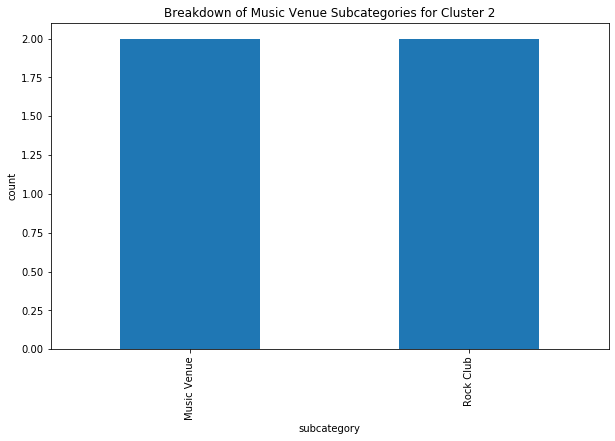

In [74]:
df_cluster2=cluster_data[cluster_data.cluster == 2]
df_cluster2=df_cluster2['categories'].value_counts()

df_cluster2.plot(kind='bar', figsize=(10, 6))

plt.xlabel('subcategory') # add to x-label to the plot
plt.ylabel('count') # add y-label to the plot
plt.title('Breakdown of Music Venue Subcategories for Cluster 2') # add title to the plot

plt.show()

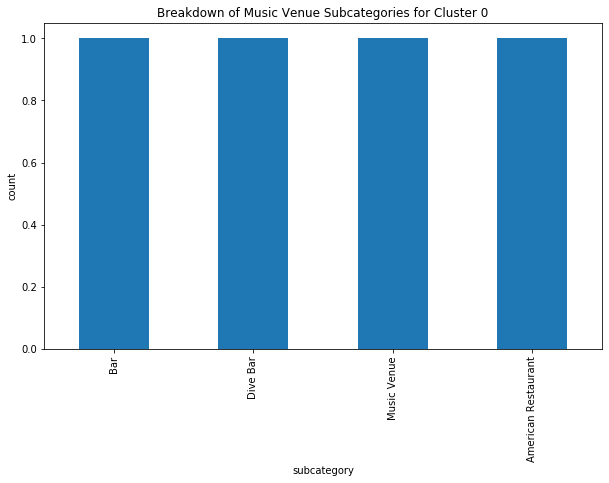

In [75]:
df_cluster0=cluster_data[cluster_data.cluster == 0]
df_cluster0=df_cluster0['categories'].value_counts()

df_cluster0.plot(kind='bar', figsize=(10, 6))

plt.xlabel('subcategory') # add to x-label to the plot
plt.ylabel('count') # add y-label to the plot
plt.title('Breakdown of Music Venue Subcategories for Cluster 0') # add title to the plot

plt.show()

### Finally we can use the Foursqure API one more time to retrieve the ratings for each venue.
### The free version of the Foursquare API limits the number of calls you can make to retrieve this information.
### I found this out the hard way and had to create a new account!
### So lets play it safe here with a simple loop that will easily show us all 50 results.

In [60]:
i_list = dataframe_filtered['id'].tolist()

for t in i_list:
    result = requests.get('https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(t, CLIENT_ID, CLIENT_SECRET, VERSION)).json()
    try:
        print(result['response']['venue']['rating'], t)
    except:
        print('This venue has not been rated yet.', t)


8.9 5538733e498e339377d11a0f
8.8 4b058668f964a520cb6022e3
7.4 4c2a5387d1a10f478144f664
6.4 4b1c441cf964a5203a0524e3
7.8 4b058669f964a520f36022e3
8.3 4c51f113250dd13aa45a0b7e
6.9 4b058669f964a520f16022e3
This venue has not been rated yet. 5dbaf91c212f1d0008e5459b
8.9 5838b1be424f9379714ee353
8.0 4b197e7ef964a5205cde23e3
This venue has not been rated yet. 5a8a4a87c97f285cf671ab4d
7.6 4b05866af964a520326122e3
8.7 4b058674f964a5200b6322e3
9.3 4b073747f964a520d4f922e3
7.8 4b135005f964a520509623e3
8.3 4f4969b8e4b096208878d9eb
8.6 4b058669f964a520ed6022e3
8.8 4b05866af964a5200b6122e3
8.5 4e7d64ac196b2107d844db5c
8.5 4b10b461f964a520f17423e3
8.7 5ae733e073fe25002b458d68
7.2 59dd8f70065ef52f745c23af
This venue has not been rated yet. 570f493e498e41406f476d6a
8.8 4e1b0c6662e16895c3f56d8a
8.7 4b05866af964a520236122e3
7.8 5698a1c1498e3186137bb598
8.2 4b05866af964a5201f6122e3
8.8 4b05866df964a520a86122e3
8.0 4b05866af964a520166122e3
7.9 4bafdb84f964a52092263ce3
This venue has not been rated yet. 4c

### Using those results, we can display a dataframe that shows the clusters and names of the top 10 venues based on ratings.

In [68]:
df_scores=dataframe_filtered[['id','name','cluster']]
df_scores=df_scores.set_index('id')
df_scores.loc[['4b073747f964a520d4f922e3','55807ef3498eb8ba1bef5b66','4b05866ff964a520296222e3','4b8c3d87f964a520f7c532e3','4c896989770fb60c02aac9c3','5538733e498e339377d11a0f','5838b1be424f9379714ee353','4b058668f964a520cb6022e3','4e1b0c6662e16895c3f56d8a','4b05866df964a520a86122e3'], : ]

,name,cluster
id,,
4b073747f964a520d4f922e3,Centennial Park,-1
55807ef3498eb8ba1bef5b66,Ascend Amphitheater,1
4b05866ff964a520296222e3,Ryman Auditorium,1
4b8c3d87f964a520f7c532e3,Bridgestone Arena,1
4c896989770fb60c02aac9c3,Live On The Green Music Festival,1
5538733e498e339377d11a0f,The Basement East,-1
5838b1be424f9379714ee353,Nudie's Honky Tonk,1
4b058668f964a520cb6022e3,3rd & Lindsley Bar and Grill,3
4e1b0c6662e16895c3f56d8a,RCA Studio B,4


### Cluster 1, located in the central downtown area, not only has the most venues, but by far the most top 10 venues as well.
### There are two venues in the top 10 that have a -1 cluster value, meaning they are not located in any cluster.